# Upload File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("USvideos_modified.csv", sep=",")

# General Clean up of Data

In [2]:
#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
df.tags= df.tags.fillna('')
df = df.dropna() #no information provided for subscribers to we eliminate those rows
df.shape

(4525, 23)

In [3]:
df.columns

Index(['video_id', 'last_trending_date', 'publish_date', 'publish_hour',
       'category_id', 'channel_title', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'tag_appeared_in_title_count', 'tag_appeared_in_title', 'title', 'tags',
       'description', 'trend_day_count', 'trend.publish.diff',
       'trend_tag_highest', 'trend_tag_total', 'tags_count', 'subscriber'],
      dtype='object')

## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(df,var_1,var_2):
    
    x = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = LinearRegression()
    
    # Fit the data(train the model)
    regression_model.fit(x, y)
    
    # Predict
    y_predicted = regression_model.predict(x)
    
    # model evaluation
    rmse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)
    
    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    # plotting values
    # data points
    plt.scatter(x, y, s=10)
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    # predicted values
    plt.plot(x, y_predicted, color='red')
    plt.show()

## Lasso Regression

In [5]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

#L1 Regularization Method
def lasso_regression(df,var_1,var_2,a):
    
    x = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = Lasso(alpha=a)
    
    # Fit the data(train the model)
    regression_model.fit(x, y)
    
    # Predict
    y_predicted = regression_model.predict(x)
    
    # model evaluation
    rmse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)
    
    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    # plotting values
    # data points
    plt.scatter(x, y, s=10)
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    # predicted values
    plt.plot(x, y_predicted, color='red')
    plt.show()
    
#Function determines best alpha value for lasso
def L_Alpha(df,var1,var2):
    
    x = np.array(df[[var1]])
    y = np.array(df[var2])

    regr_cv = LassoCV(alphas= [.1,1,10,100,1000,2000,3000,4000])
    model_cv = regr_cv.fit(x, y)
    print(model_cv.alpha_)

## Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

#L2 Regularization Method
def ridge_regression(df,var_1,var_2,a):
    
    x = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = Ridge(alpha=a)
    
    # Fit the data(train the model)
    regression_model.fit(x, y)
    
    # Predict
    y_predicted = regression_model.predict(x)
    
     # model evaluation
    rmse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y, y_predicted)
    
    # printing values
    print('Slope:' ,regression_model.coef_)
    print('Intercept:', regression_model.intercept_)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    # plotting values
    # data points
    plt.scatter(x, y, s=10)
    plt.xlabel(var_1)
    plt.ylabel(var_2)
    # predicted values
    plt.plot(x, y_predicted, color='red')
    plt.show()
    
#Function determines best alpha value for ridge
def R_Alpha(df,var1,var2):
    
    x = np.array(df[[var1]])
    y = np.array(df[var2])

    regr_cv = RidgeCV(alphas= [1,10,100,1000,2000,3000,4000])
    model_cv = regr_cv.fit(x, y)
    print(model_cv.alpha_)

### trend_day_count vs trend.publish.diff

Slope: [-5.82403265]
Intercept: 62.74543085161562
Root mean squared error:  61311.85336321304
R2 score:  0.0037623569109577204


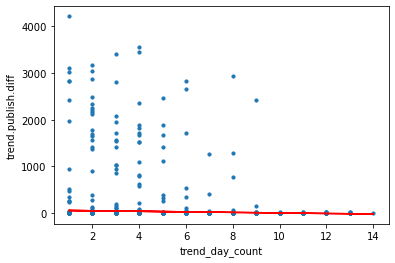

In [7]:
linear_regression(df,'trend_day_count','trend.publish.diff')

In [8]:
L_Alpha(df,'trend_day_count','trend.publish.diff')

1.0


Slope: [-5.67754327]
Intercept: 62.03677840537147
Root mean squared error:  61311.9998525835
R2 score:  0.003759976649765684


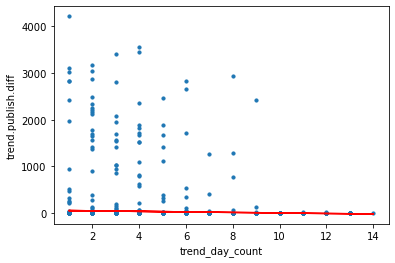

In [9]:
lasso_regression(df,'trend_day_count','trend.publish.diff',1)

In [10]:
R_Alpha(df,'trend_day_count','trend.publish.diff')

2000


Slope: [-5.4698763]
Intercept: 61.03217506408518
Root mean squared error:  61312.70958041036
R2 score:  0.003748444498335335


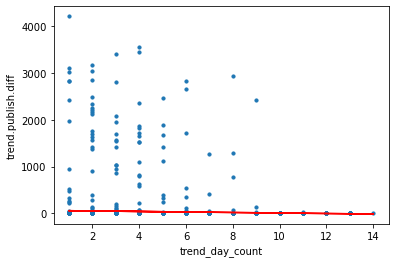

In [11]:
ridge_regression(df,'trend_day_count','trend.publish.diff',2000)